In [1]:
!python -V

Python 3.10.9


In [2]:
import pandas as pd

df = pd.read_parquet('./data/yellow_tripdata_2022-01.parquet')

In [3]:
len(df.columns)

19

In [4]:
df['trip_duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime)/ pd.Timedelta(minutes=1)

In [5]:
df.trip_duration.describe()['std']

46.44530513776499

In [6]:
df.trip_duration

0          17.816667
1           8.400000
2           8.966667
3          10.033333
4          37.533333
             ...    
2463926     5.966667
2463927    10.650000
2463928    11.000000
2463929    12.050000
2463930    27.000000
Name: trip_duration, Length: 2463931, dtype: float64

<Axes: >

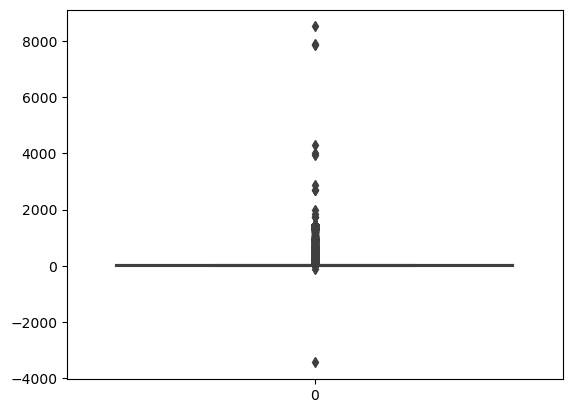

In [7]:
import seaborn as sns

sns.boxplot(df.trip_duration)

In [8]:
df_filtered = df.loc[(df['trip_duration'] > 1) & (df['trip_duration'] <60)]

<Axes: >

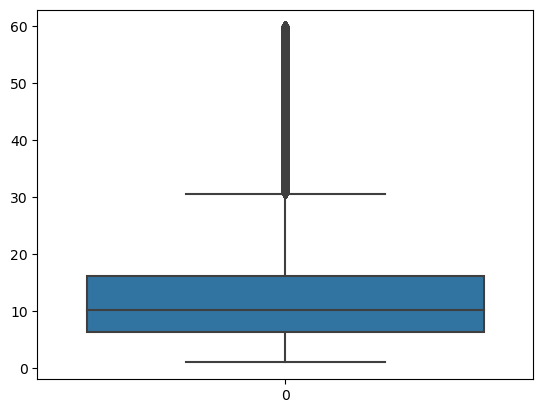

In [9]:
sns.boxplot(df_filtered.trip_duration)

In [10]:
df_filtered.shape[0]/df.shape[0]

0.9825883922885827

In [11]:
df = df_filtered

In [12]:
cat = ['PULocationID','DOLocationID']

In [13]:
df[cat] = df[cat].astype(str)
train_dicts = df[cat].to_dict(orient='records')

In [14]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [15]:
X_train

<2421030x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842060 stored elements in Compressed Sparse Row format>

In [16]:
target = 'trip_duration'
y_train = df[target].values

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_9015/124520470.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'prediction')
/tmp/ipykernel_9015/124520470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label = 'actual')


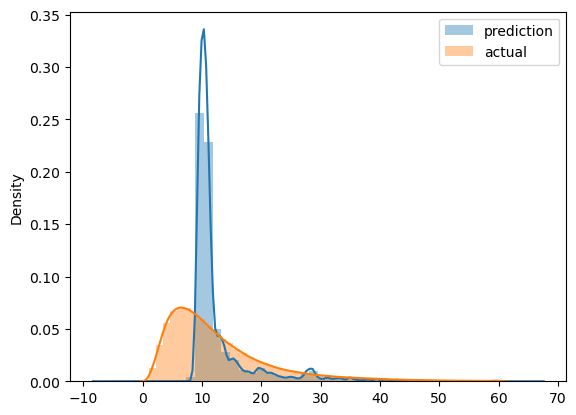

In [20]:
import matplotlib.pyplot as plt

sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')
plt.legend()

In [21]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred,y_train,squared=False)

6.983870772755797

In [22]:
df_val = pd.read_parquet('./data/yellow_tripdata_2022-02.parquet')
df_val['trip_duration'] = (df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime)/ pd.Timedelta(minutes=1)
df_val = df_val.loc[(df_val['trip_duration'] > 1) & (df_val['trip_duration'] <60)]

In [23]:
val_dicts = df_val[cat].to_dict(orient='records')

In [24]:
X_val = dv.transform(val_dicts)

In [25]:
y_val = df_val[target].values

In [26]:
y_pred_val = lr.predict(X_val)
mean_squared_error(y_pred_val,y_val,squared=False)

14.625274994111248